In [1]:
import math as mt
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

Download SPX data from Yahoo Finance

In [3]:
SPX = yf.download('^SPX',start='2014-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
SPX.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX,^SPX
Date,,,,,,
2024-11-12 00:00:00+00:00,5983.990234,5983.990234,6009.919922,5960.080078,6003.600098,4243400000
2024-11-13 00:00:00+00:00,5985.379883,5985.379883,6008.189941,5965.910156,5985.750000,4220180000
2024-11-14 00:00:00+00:00,5949.169922,5949.169922,5993.879883,5942.279785,5989.680176,4184570000
2024-11-15 00:00:00+00:00,5870.620117,5870.620117,5915.319824,5853.009766,5912.790039,4590960000
2024-11-18 00:00:00+00:00,5893.620117,5893.620117,5908.120117,5865.950195,5874.169922,3983860000


In [5]:
SPX.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX,^SPX
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2.739000e+03
mean,3197.041216,3197.041216,3213.374517,3178.444260,3196.541757,3.946542e+09
std,1080.332745,1080.332745,1086.007594,1074.133181,1080.125547,9.467553e+08
min,1741.890015,1741.890015,1755.790039,1737.920044,1743.819946,1.296530e+09
25%,2164.569946,2164.569946,2171.880005,2157.484985,2165.844971,3.374595e+09
50%,2881.399902,2881.399902,2893.629883,2865.169922,2882.729980,3.771790e+09
75%,4129.294922,4129.294922,4149.604980,4103.194824,4128.099854,4.288160e+09
max,6001.350098,6001.350098,6017.310059,5986.689941,6008.859863,9.976520e+09


Review the dataframe for number of columns, datatypes etc.

In [7]:
SPX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2739 entries, 2014-01-02 00:00:00+00:00 to 2024-11-18 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, ^SPX)  2739 non-null   float64
 1   (Close, ^SPX)      2739 non-null   float64
 2   (High, ^SPX)       2739 non-null   float64
 3   (Low, ^SPX)        2739 non-null   float64
 4   (Open, ^SPX)       2739 non-null   float64
 5   (Volume, ^SPX)     2739 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 149.8 KB


In [8]:
SPX.shape

(2739, 6)

Plot data

<Axes: xlabel='Date'>

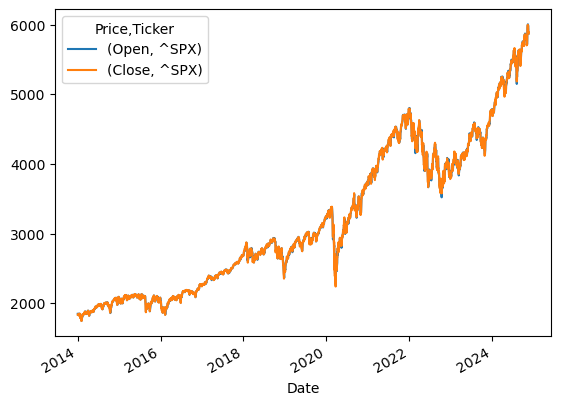

In [10]:
to_plot = ['Open','Close']
SPX[to_plot].plot()

<Axes: xlabel='Date'>

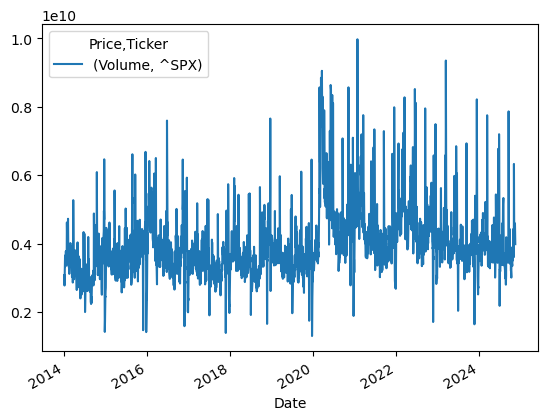

In [11]:
to_plot_volume = ['Volume']
SPX[to_plot_volume].plot()

Check for an NULL values in the dataframe. There is none.

In [13]:
SPX.isnull().sum()

Price      Ticker
Adj Close  ^SPX      0
Close      ^SPX      0
High       ^SPX      0
Low        ^SPX      0
Open       ^SPX      0
Volume     ^SPX      0
dtype: int64

Plot the distrubition of the data.  We can see several peaks in the data and looking at the Volume colume, the data follows a normal distrubition.

C:\Users\walsh\AppData\Local\Temp\ipykernel_14268\2310538752.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(SPX[col])
C:\Users\walsh\AppData\Local\Temp\ipykernel_14268\2310538752.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(SPX[col])
C:\Users\walsh\AppData\Local\Temp\ipykernel_14268\23

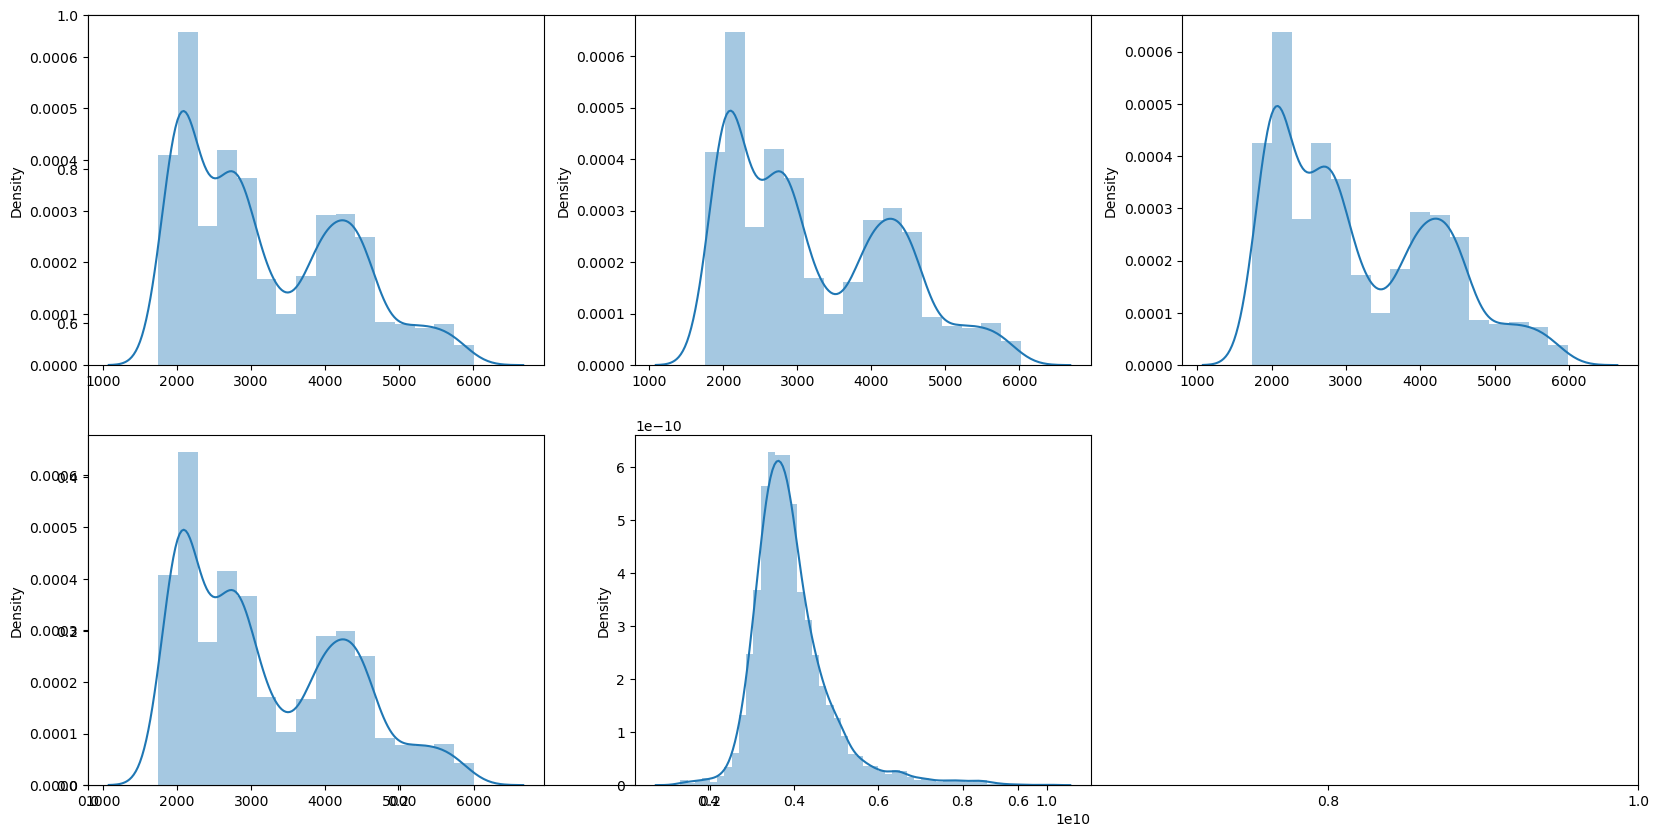

In [15]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(SPX[col])
plt.show()

Review Boxplots to see any outliers in the columns of the dataframe.  We can see the Volume colume is the only one with outliers.

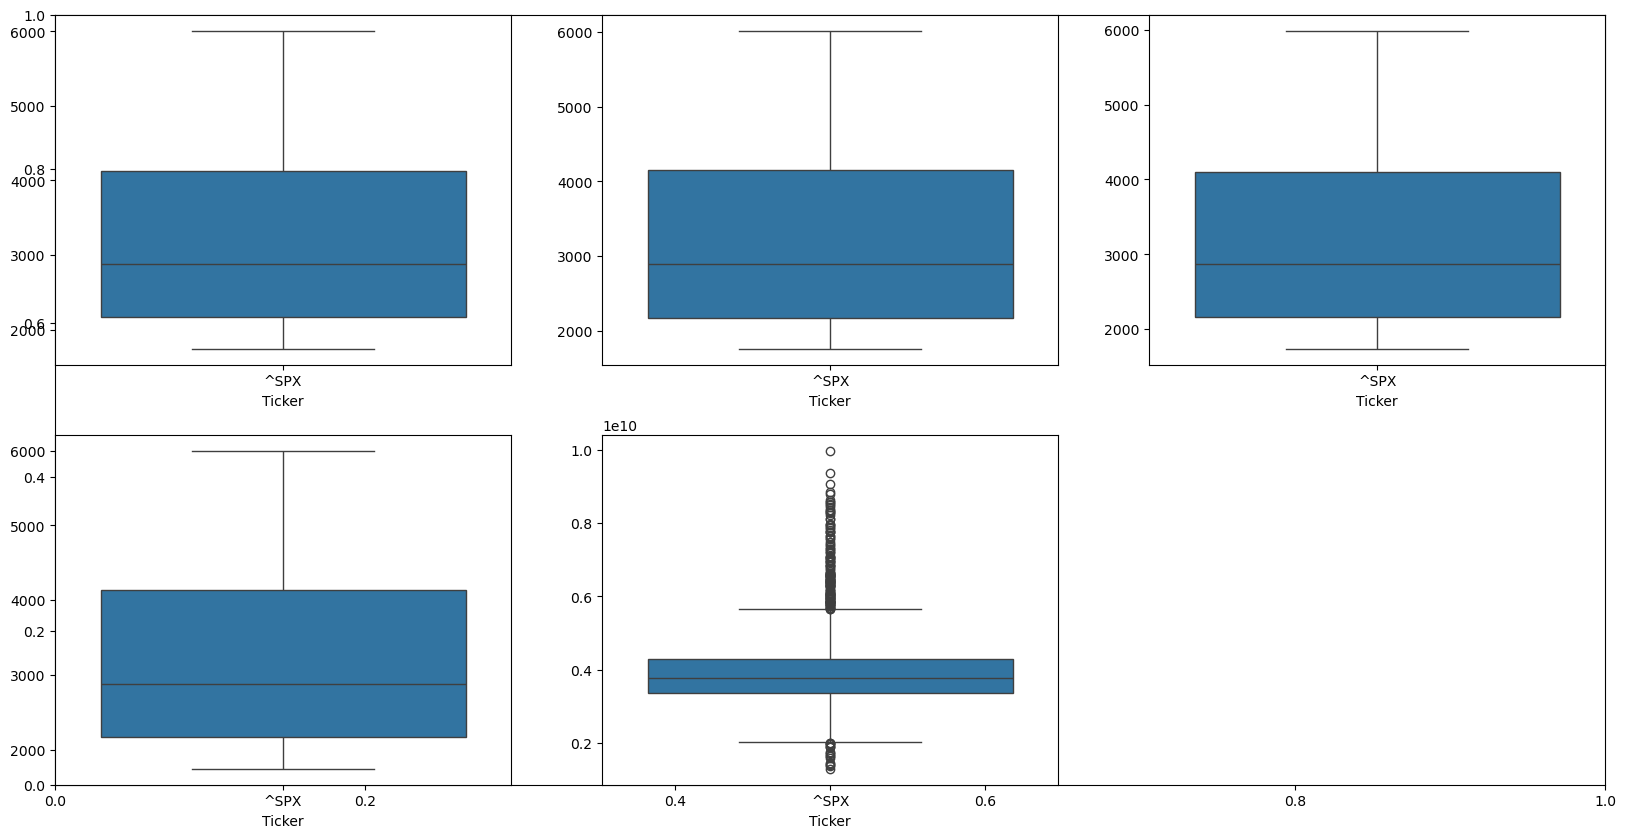

In [17]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(SPX[col])
plt.show()

Heatmap to view correlation of each column.  We can see the data is strongly postive correlated.

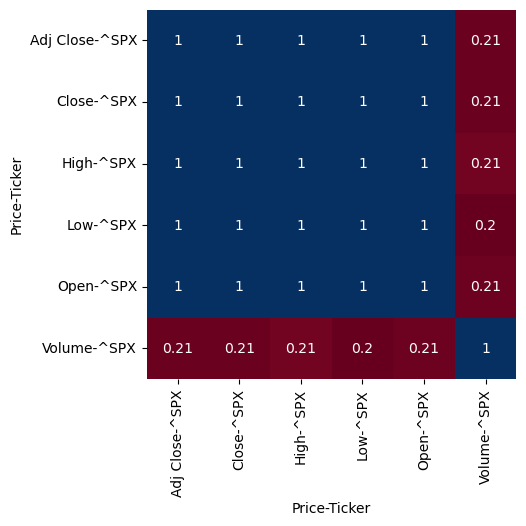

In [19]:
sb.heatmap(SPX.corr(), 
               cmap='RdBu',
			annot=True, 
			cbar=False,
            square=True) 
plt.show()

Training dataset has 3 variables obtained from the original dataframe.

In [21]:
SPX['open-close']  = SPX['Open'] - SPX['Close']
SPX['low-high']  = SPX['Low'] - SPX['High']
SPX['target'] = np.where(SPX['Close'].shift(-1) > SPX['Close'], 1, 0)

StandardScaler standardizes the features by removing the mean and scaling to unit variance (z-score normalization). This is useful for many machine learning models (especially models like SVMs or K-means clustering that are sensitive to the scale of the data).

fit_transform(features) first fits the scaler to the data (computes the mean and standard deviation for each feature) and then transforms the features by applying the scaling operation.

We have split the dataset into 90/10 (test_size=0.1) meaning that 10% of the data will be used for validation (and the remaining 90% will be used for training).  random_state=2024 ensures reproducibility of the split. Setting a fixed random seed guarantees the same random split every time you run the code.

In [22]:
features = SPX[['open-close', 'low-high']]
target = SPX['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2024)
print(X_train.shape, X_valid.shape)

(2465, 2) (274, 2)


Model comment
i in range (3) prints the details of the 3 models (LogisticRegression, SVC and XGBClassifier)
From the results, XGBClassifier has the highest performance but the difference in training and validation accuracy is too large. LogisticRegression has the closest results of training and validation accuracy.

In [56]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5137717923435338
Validation Accuracy :  0.5400394267142629

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.48519175669811404
Validation Accuracy :  0.4465341786989184

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

To evulate module performace we can use confusion matrix.  As the Logistic Regression model performed best with training and validation accuracy, it's good to view the performace.  To view theh results of each model change 0 to 1,2 etc..

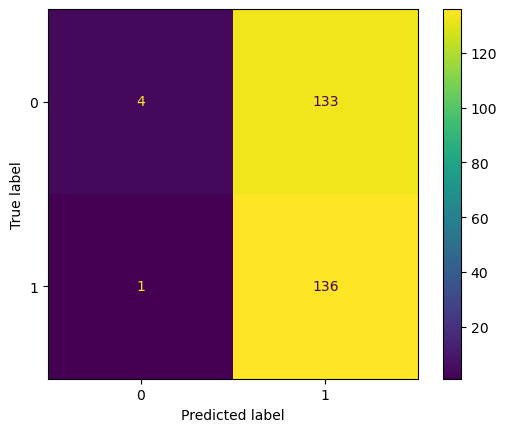

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

In [92]:
print(models[0], X_valid, Y_valid)

LogisticRegression() [[ 2.14107607e-01  6.02183771e-01]
 [ 4.80347244e-02  8.83853706e-01]
 [-9.27194344e-01 -2.46680825e-02]
 [-1.04606712e-01  7.76050819e-01]
 [-1.65789260e+00 -6.64236512e-01]
 [ 6.71122082e-02  8.13075107e-01]
 [ 7.94825956e-02  7.39035393e-01]
 [-2.78447750e-01  4.55548805e-01]
 [-6.32146801e-01  4.42841091e-01]
 [-2.01430442e-01  8.97288081e-01]
 [-3.49823332e-01  7.81500780e-01]
 [ 1.48184226e-02  8.75142630e-01]
 [-3.26135878e+00 -2.25878875e+00]
 [ 1.59072297e+00 -1.43193663e+00]
 [ 1.04338939e+00 -3.29210130e-01]
 [ 8.39873230e-01 -1.61995585e+00]
 [ 4.45901408e-01  1.93472144e-01]
 [ 5.41655452e-01 -1.80386317e-01]
 [-8.13065874e-01  1.20017363e-02]
 [-1.80240357e+00 -6.55162105e-01]
 [-1.83047391e-01  7.61898644e-01]
 [ 2.37584575e+00 -1.72630541e+00]
 [-2.60785010e-01  8.83494806e-01]
 [ 4.50578665e+00 -4.44717406e+00]
 [ 1.52818091e+00 -9.23052057e-01]
 [-3.52299135e-01  8.39571665e-01]
 [ 9.80855965e-01  2.70064035e-01]
 [ 1.71699779e-01  7.62988636e-01]

The resuts shows the the model performed no better than guessing the outcome of stock prices for SPX.